In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import warnings
import os

In [2]:
e1=pd.read_excel("case_study1.xlsx")
e2=pd.read_excel("case_study2.xlsx")

In [3]:
df1=e1.copy()
df2=e2.copy()

## Exploratoy Data Analysis

## Step 1: Handling null values here represented with -99999

In [4]:
#Data Cleaning


#Removing null values
#For dataframe df1


print("For df1: ")
for i in df1.columns:
  if df1.loc[df1[i]==-99999].shape[0]>0:
    print(i," ",df1.loc[df1[i]==-99999].shape[0])




For df1: 
Age_Oldest_TL   40
Age_Newest_TL   40


In [5]:
print("For df2: ")
cols_remove=[]
for i in df2.columns:
  if df2.loc[df2[i]==-99999].shape[0]>0:
    print(i," ",df2.loc[df2[i]==-99999].shape[0])

For df2: 
time_since_recent_payment   4291
time_since_first_deliquency   35949
time_since_recent_deliquency   35949
max_delinquency_level   35949
max_deliq_6mts   12890
max_deliq_12mts   10832
tot_enq   6321
CC_enq   6321
CC_enq_L6m   6321
CC_enq_L12m   6321
PL_enq   6321
PL_enq_L6m   6321
PL_enq_L12m   6321
time_since_recent_enq   6321
enq_L12m   6321
enq_L6m   6321
enq_L3m   6321
pct_currentBal_all_TL   72
CC_utilization   47636
PL_utilization   44435
max_unsec_exposure_inPct   23178


In [6]:
#Remove nulls from df1:
#Removing the rows of those features that have null values
df1=df1.loc[df1['Age_Oldest_TL']!=-99999]

In [7]:
#Check for null values for df1

for i in df1.columns:
  if df1.loc[df1[i]==-99999].shape[0]>0:
    print(i," ",df1.loc[df1[i]==-99999].shape[0])
print("No more null values in the df1 dataframe")

No more null values in the df1 dataframe


In [8]:
#Removing the null values from df2
# There are some features which have null values greater than 10000 and some less than 10k


#We will drop those columns which are greater than 10k
cols_remove=[]
for i in df2.columns:
  if df2.loc[df2[i]==-99999].shape[0]>10000:
    cols_remove.append(i)

print(cols_remove)

['time_since_first_deliquency', 'time_since_recent_deliquency', 'max_delinquency_level', 'max_deliq_6mts', 'max_deliq_12mts', 'CC_utilization', 'PL_utilization', 'max_unsec_exposure_inPct']


In [9]:
df2=df2.drop(cols_remove,axis=1)#Droping those feature columns

In [10]:
#Removing the rows of those features that have null values <10k since the data set is about 51k so we can easily neglect
for i in df2.columns:
  df2=df2.loc[df2[i]!=-99999]


In [11]:
#Check for null values for df2

for i in df2.columns:
  if df2.loc[df2[i]==-99999].shape[0]>0:
    print(i," ",df2.loc[df2[i]==-99999].shape[0])
print("No more null values in the df2 dataframe")

No more null values in the df2 dataframe


In [12]:
#Merge two excel files into a single dataframe df based on commo feature PROSPECTID

df=pd.merge(df1,df2,how='inner',left_on=['PROSPECTID'],right_on=['PROSPECTID'])

In [13]:
df

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0.0,0.0,0.000,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,1,0,ConsumerLoan,others,693,P2
3,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0.0,0.0,0.000,0.0,0,0,AL,AL,753,P1
4,6,6,5,1,0,0,0.000,0.00,0.167,0.833,...,1.0,0.0,0.429,0.0,1,0,ConsumerLoan,PL,668,P3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,650,P4
42060,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0.0,0.0,0.000,0.0,0,0,others,others,702,P1
42061,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,1.0,0.0,1.000,0.0,0,0,ConsumerLoan,others,661,P3
42062,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,others,686,P2


In [14]:
#Find the categorical Columns:
cat_cols=[]
for i in df.columns:
  if df[i].dtype=='object' and i!='Approved_Flag':
    cat_cols.append(i)

cat_cols


['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']

## Chi-Square test.
It  is a statistical method crucial for analyzing associations in categorical data


We are actually comparing the categorical columns with the the target column by chi2 test and find the pval (measures the associativity) if the associativity is less than 5%(threshold alpha) then discard the feature

In [15]:
#Chi-squarred Test
for i in cat_cols:
  chi2,pval,_,_=chi2_contingency(pd.crosstab(df[i],df['Approved_Flag']))
  print(i,"---->",pval)

MARITALSTATUS ----> 3.578180861038862e-233
EDUCATION ----> 2.6942265249737532e-30
GENDER ----> 1.907936100186563e-05
last_prod_enq2 ----> 0.0
first_prod_enq2 ----> 7.84997610555419e-287


alpha value is taken as 0.05 all the categorical columns have pval less than 0.05 so we are selection all the categorical columns

In [16]:
#Find the numerical columns:
num_cols=[]
for i in df.columns:
  if df[i].dtype !='object' and i not in ['PROSPECTID','Approved_Flag']:
    num_cols.append(i)
num_cols

['Total_TL',
 'Tot_Closed_TL',
 'Tot_Active_TL',
 'Total_TL_opened_L6M',
 'Tot_TL_closed_L6M',
 'pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'pct_active_tl',
 'pct_closed_tl',
 'Total_TL_opened_L12M',
 'Tot_TL_closed_L12M',
 'pct_tl_open_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'Auto_TL',
 'CC_TL',
 'Consumer_TL',
 'Gold_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'num_times_delinquent',
 'max_recent_level_of_deliq',
 'num_deliq_6mts',
 'num_deliq_12mts',
 'num_deliq_6_12mts',
 'num_times_30p_dpd',
 'num_times_60p_dpd',
 'num_std',
 'num_std_6mts',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_6mts',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_6mts',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'CC_enq_L12m',
 'PL_enq',
 'PL_enq_L6m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L12m',
 'enq_L6m',
 'enq_L3m',

## VIF (Variation Inflation Factor)
## VIF=1/(1-Ri^2)
It is a MultiColinearity Measure



We are checkin whether the 72 numerical columns are associated with eachother or not (Considering the threshold VIF value =6)


If the VIF<6 then discard the columns else keep and go for next phase

In [17]:
#Check for Multicolinearity
vif_data=df[num_cols]
tot_cols=vif_data.shape[1]
cols_keep=[]
col_ind=0

Setting the theshold vif value as 6

In [18]:
for i in range(0,tot_cols):
  vif_value=variance_inflation_factor(vif_data,col_ind)
  #print(col_ind,'====>',vif_value)

  if vif_value<=6:
    cols_keep.append(num_cols[i])
    col_ind+=1
  else:
    vif_data=vif_data.drop(num_cols[i],axis=1)

cols_keep

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


['pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'Tot_TL_closed_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'CC_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'max_recent_level_of_deliq',
 'num_deliq_6_12mts',
 'num_times_60p_dpd',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'CC_enq_L12m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L3m',
 'NETMONTHLYINCOME',
 'Time_With_Curr_Empr',
 'pct_currentBal_all_TL',
 'CC_Flag',
 'PL_Flag',
 'pct_PL_enq_L6m_of_ever',
 'pct_CC_enq_L6m_of_ever',
 'HL_Flag',
 'GL_Flag']

In [19]:
len(cols_keep)
vif_data

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,enq_L3m,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_currentBal_all_TL,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag
0,0.000,0.00,0,0.000,0,0,0,4,1,4,...,0,51000,114,0.798,0,1,0.000,0.0,1,0
1,0.000,0.00,0,0.000,0,0,0,0,0,1,...,0,19000,50,0.370,0,0,0.000,0.0,0,0
2,0.125,0.00,0,0.000,1,0,0,0,2,6,...,0,18,191,0.585,0,0,0.000,0.0,1,0
3,0.000,0.00,0,0.000,0,0,0,0,3,0,...,0,15000,75,0.000,0,0,0.000,0.0,0,0
4,0.000,0.00,1,0.167,0,0,0,0,6,0,...,4,0,154,0.000,0,0,0.429,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,0.333,0.00,0,0.000,0,0,0,0,0,3,...,1,18500,249,0.230,0,0,0.000,0.0,0,0
42060,0.000,0.25,1,0.250,0,0,0,0,2,2,...,0,25000,186,0.660,0,0,0.000,0.0,0,0
42061,0.500,0.50,1,0.500,0,0,0,0,0,2,...,2,18000,66,0.428,0,0,1.000,0.0,0,0
42062,0.000,0.00,1,0.500,0,0,0,0,0,2,...,0,12802,54,0.143,0,0,0.000,0.0,0,0


Earlier 72 numerical columns were there now only 39 are of them selected for next phase and 33 are discarded

## One Way ANOVA

It is used to find the pval(degree of associativity with the target column) for numrical features

In [20]:
from scipy.stats import f_oneway

num_cols_sel=[]

for i in cols_keep:
  a=list(df[i])
  b=list(df['Approved_Flag'])

  grp_P1=[val for val,grp in zip(a,b) if grp=='P1']
  grp_P2=[val for val,grp in zip(a,b) if grp=='P2']
  grp_P3=[val for val,grp in zip(a,b) if grp=='P3']
  grp_P4=[val for val,grp in zip(a,b) if grp=='P4']


  f_statistic,p_value=f_oneway(grp_P1,grp_P2,grp_P3,grp_P4)

  if p_value<=0.5:
    num_cols_sel.append(i)


num_cols_sel

['pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'Tot_TL_closed_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'CC_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'max_recent_level_of_deliq',
 'num_deliq_6_12mts',
 'num_times_60p_dpd',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'CC_enq_L12m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L3m',
 'NETMONTHLYINCOME',
 'Time_With_Curr_Empr',
 'CC_Flag',
 'PL_Flag',
 'pct_PL_enq_L6m_of_ever',
 'pct_CC_enq_L6m_of_ever',
 'HL_Flag',
 'GL_Flag']

In [21]:
len(num_cols_sel)

38

In [22]:
df=df[num_cols_sel+cat_cols+['Approved_Flag']]

In [23]:
df.shape

(42064, 44)

In [24]:
for i in cat_cols:
  print(i," ",df[i].value_counts())

MARITALSTATUS   MARITALSTATUS
Married    30886
Single     11178
Name: count, dtype: int64
EDUCATION   EDUCATION
GRADUATE          14140
12TH              11703
SSC                7241
UNDER GRADUATE     4572
OTHERS             2291
POST-GRADUATE      1898
PROFESSIONAL        219
Name: count, dtype: int64
GENDER   GENDER
M    37345
F     4719
Name: count, dtype: int64
last_prod_enq2   last_prod_enq2
ConsumerLoan    16480
others          13653
PL               7553
CC               2195
AL               1353
HL                830
Name: count, dtype: int64
first_prod_enq2   first_prod_enq2
others          20640
ConsumerLoan    11075
PL               4431
AL               2641
CC               1988
HL               1289
Name: count, dtype: int64


In [25]:
df['MARITALSTATUS'].unique()
df['EDUCATION'].unique()
df['GENDER'].unique()
df['last_prod_enq2'].unique()
df['first_prod_enq2'].unique()



array(['PL', 'ConsumerLoan', 'others', 'AL', 'HL', 'CC'], dtype=object)

## Encoding

Label Encoding the Education column feature explicitly... Other categorical feature can't be label encoded since they are cannot be judged or classified as High Medium Low

In [26]:
df.loc[df['EDUCATION'] == 'SSC',['EDUCATION']]              = 1
df.loc[df['EDUCATION'] == '12TH',['EDUCATION']]             = 2
df.loc[df['EDUCATION'] == 'GRADUATE',['EDUCATION']]         = 3
df.loc[df['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']]   = 3
df.loc[df['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']]    = 4
df.loc[df['EDUCATION'] == 'OTHERS',['EDUCATION']]           = 1
df.loc[df['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']]     = 3


In [27]:
df_encoded=pd.get_dummies(df,columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'])

In [28]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               42064 non-null  float64
 1   pct_tl_closed_L6M             42064 non-null  float64
 2   Tot_TL_closed_L12M            42064 non-null  int64  
 3   pct_tl_closed_L12M            42064 non-null  float64
 4   Tot_Missed_Pmnt               42064 non-null  int64  
 5   CC_TL                         42064 non-null  int64  
 6   Home_TL                       42064 non-null  int64  
 7   PL_TL                         42064 non-null  int64  
 8   Secured_TL                    42064 non-null  int64  
 9   Unsecured_TL                  42064 non-null  int64  
 10  Other_TL                      42064 non-null  int64  
 11  Age_Oldest_TL                 42064 non-null  int64  
 12  Age_Newest_TL                 42064 non-null  int64  
 13  t

## Segregating the data into X and Y i.e. Input Features and Target Variable

In [29]:
y=df_encoded['Approved_Flag']
x=df_encoded.drop(['Approved_Flag'],axis=1)

Spliiting X and y into train and test dataset

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Model 1: Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


param_grid={
    'C':[0.001,0.01,0.1,1,10],
    'penalty':['l1','l2'],
    'solver':['liblinear','saga'],
    'max_iter':[300,500]
}

lr_model=LogisticRegression()
grid_search=GridSearchCV(lr_model,param_grid,cv=5,scoring='accuracy')
grid_search.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [300, 500],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
best_params=grid_search.best_params_
best_accuracy=grid_search.best_score_

In [ ]:
print("Logistic Regression: ")
print("Best Parameters: ",best_params)
print("Best Accuracy: ",best_accuracy)

Logistic Regression: 
Best Parameters:  {'C': 0.1, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy:  0.7357583494611324


In [ ]:
best_model_lr=grid_search.best_estimator_
y_pred=best_model_lr.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.7344585760133128


In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve

#Plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

#Plot the classifiaction report
def plot_classification_report(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)
    plt.title("Classification Report")
    plt.show()


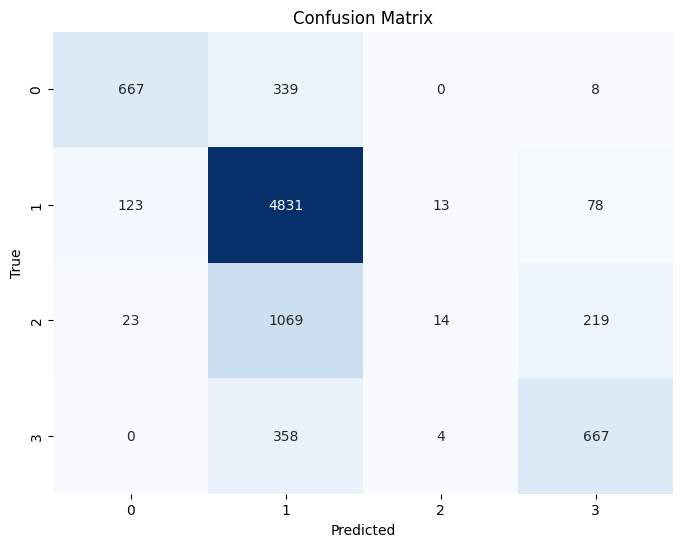

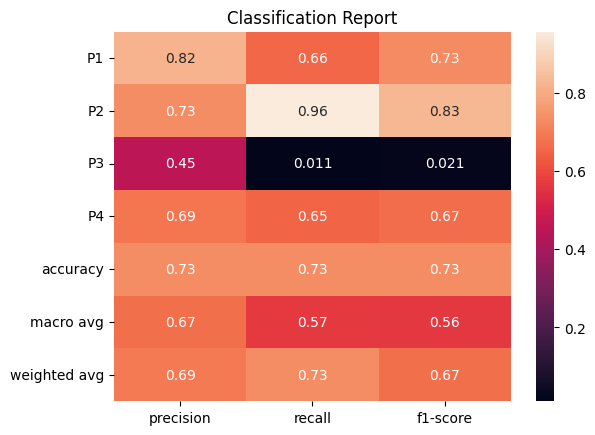

In [ ]:
plot_confusion_matrix(y_test,y_pred)
plot_classification_report(y_test,y_pred)


In [ ]:
import joblib
joblib.dump(best_model_lr,'LogReg_best_model.pkl')

['LogReg_best_model.pkl']

## Model2: KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


param_grid={
    'n_neighbors': [3, 5, 7, 9],            # Number of neighbors to consider
    'weights': ['uniform', 'distance'],     # Weighting of neighbors (uniform or distance-based)
    'p': [1, 2]    #Power Parameter for Minkowski or Euclidean Distance
}

knn_classifier=KNeighborsClassifier()

grid_serach=GridSearchCV(knn_classifier,param_grid,cv=5,scoring='accuracy')

grid_serach.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
best_params=grid_serach.best_params_
best_accuracy=grid_serach.best_score_

In [ ]:
print("K Nearest Neighbors: ")
print("Best Parameters: ",best_params)
print("Best Accuracy: ",best_accuracy)

K Nearest Neighbors: 
Best Parameters:  {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best Accuracy:  0.6321358165618571


In [ ]:
knn_best_model=grid_serach.best_estimator_
y_pred=knn_best_model.predict(x_test)


In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.6262926423392369


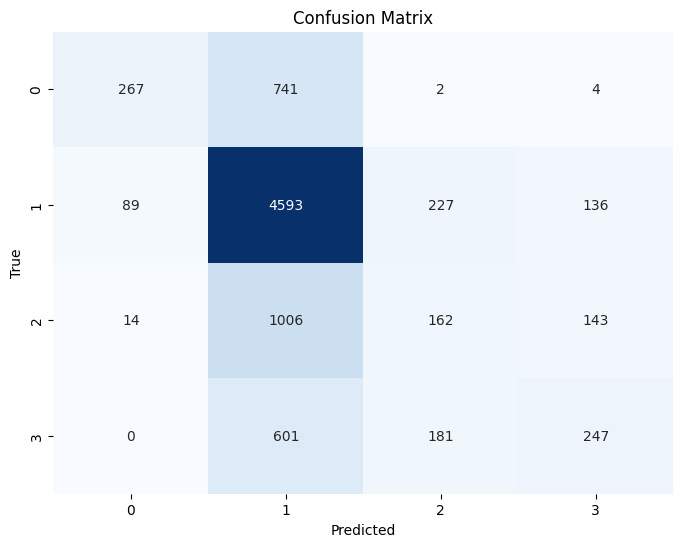

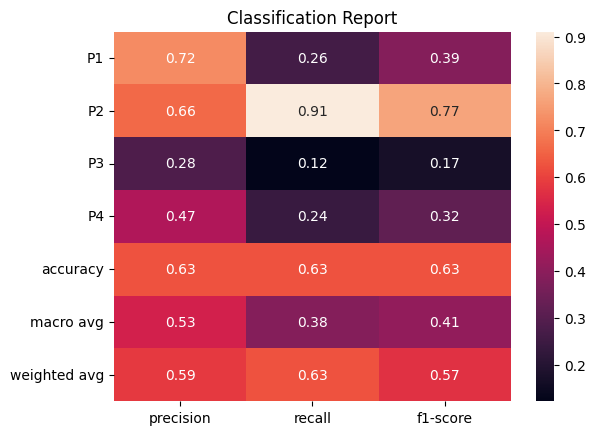

In [ ]:
plot_confusion_matrix(y_test,y_pred)
plot_classification_report(y_test,y_pred)

In [ ]:
joblib.dump(knn_best_model,'KNN_best_model.pkl')

['KNN_best_model.pkl']

## Model 3: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy'],    # Split criterion
    'max_depth': [None, 5, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]        # Minimum number of samples required to be at a leaf node
}
decision_tree_classifier = DecisionTreeClassifier()

grid_search = GridSearchCV(decision_tree_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
best_params=grid_search.best_params_
best_accuracy=grid_search.best_score_
print("Decision Tree Classifier: ")
print("Best Parameters: ",best_params)
print("Best Accuracy: ",best_accuracy)
dct_best_model=grid_search.best_estimator_
y_pred=dct_best_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

K Nearest Neighbors: 
Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Accuracy:  0.7535586802806116
Accuracy:  0.7496731249257103


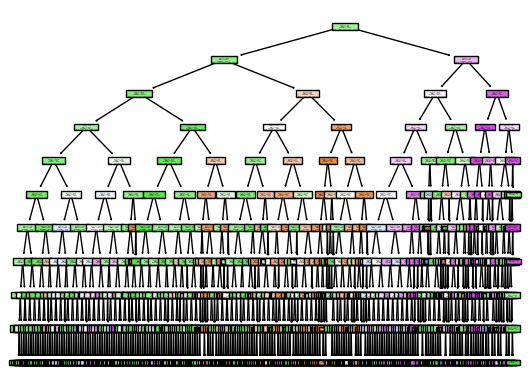

In [ ]:
from sklearn.tree import plot_tree
plot_tree(dct_best_model,filled=True)
plt.show()

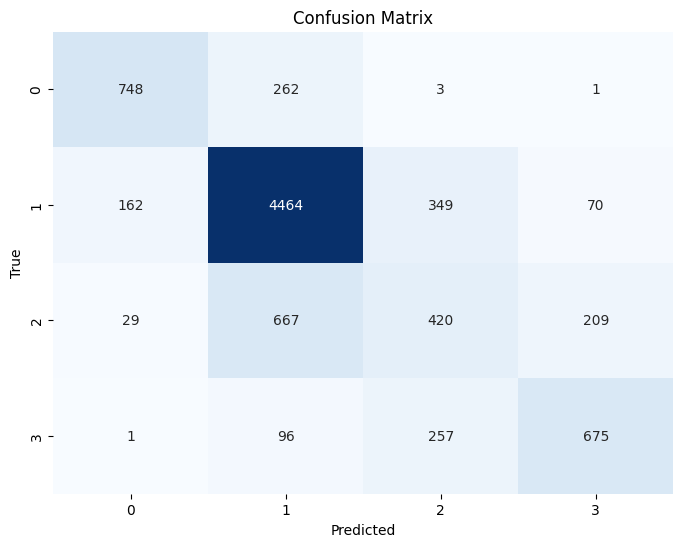

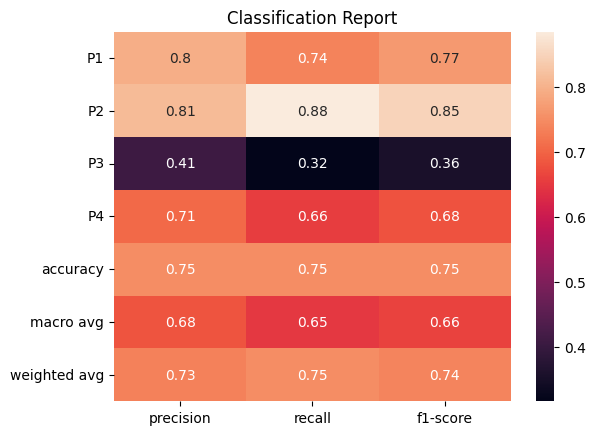

In [ ]:
plot_confusion_matrix(y_test,y_pred)
plot_classification_report(y_test,y_pred)

In [ ]:
joblib.dump(dct_best_model,'DCT_best_model.pkl')

['DCT_best_model.pkl']

## Model 4:Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees in the forest
    'criterion': ['gini', 'entropy'],     # Split criterion
    'max_depth': [None, 5, 10, 20],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]         # Minimum number of samples required to be at a leaf node
}

random_forest_classifier = RandomForestClassifier()

grid_search = GridSearchCV(random_forest_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
best_params=grid_search.best_params_
best_accuracy=grid_search.best_score_
print("Random Forest Classifier: ")
print("Best Parameters: ",best_params)
print("Best Accuracy: ",best_accuracy)
dct_best_model=grid_search.best_estimator_
y_pred=dct_best_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

Random Forest Classifier: 
Best Parameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy:  0.7718047984056382
Accuracy:  0.7634613098775704


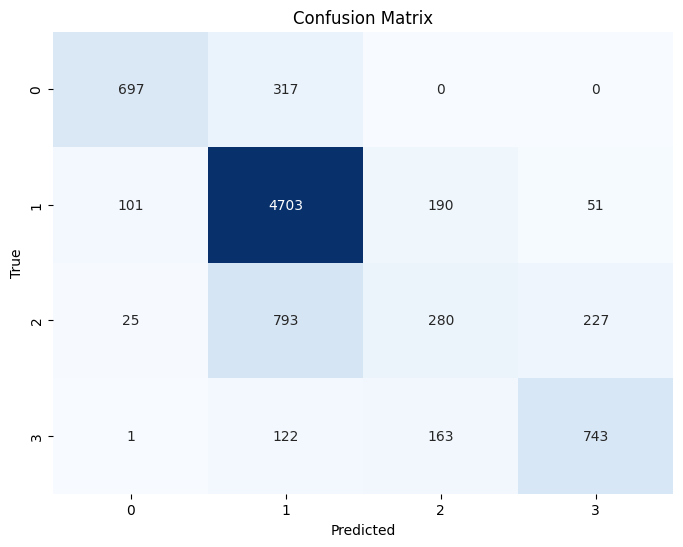

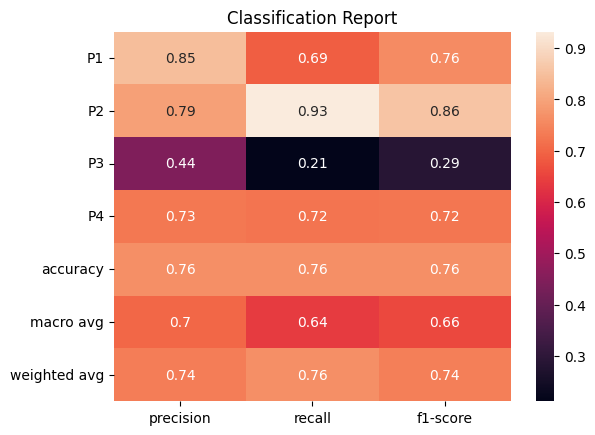

In [ ]:
plot_confusion_matrix(y_test,y_pred)
plot_classification_report(y_test,y_pred)

In [ ]:
joblib.dump(dct_best_model,'RF_best_model.pkl')

['RF_best_model.pkl']

## Model 5: Suport Vector Machine

In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1],                  # Regularization parameter
    'kernel': [ 'rbf'] # Kernel type
}

svm_classifier=SVC()

grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.1], 'kernel': ['rbf']},
             scoring='accuracy')

In [53]:
best_params=grid_search.best_params_
best_accuracy=grid_search.best_score_
print("Support Vector Machine: ")
print("Best Parameters: ",best_params)
print("Best Accuracy: ",best_accuracy)
svm_best_model=grid_search.best_estimator_
y_pred=svm_best_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

Support Vector Machine: 
Best Parameters:  {'C': 0.1, 'kernel': 'rbf'}
Best Accuracy:  0.6064307147762575
Accuracy:  0.5996671817425413


## Model 6: Adaboost

In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [ 100, 200,300],       # Number of weak learners
    'learning_rate': [0.01, 0.1, 0.2]     # Learning rate
}

adaboost_classifier = AdaBoostClassifier()

grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)



GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [34]:
best_params=grid_search.best_params_
best_accuracy=grid_search.best_score_
print("Adaboost Classifier: ")
print("Best Parameters: ",best_params)
print("Best Accuracy: ",best_accuracy)
ada_best_model=grid_search.best_estimator_
y_pred=ada_best_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

Adaboost Classifier: 
Best Parameters:  {'learning_rate': 0.2, 'n_estimators': 300}
Best Accuracy:  0.7477640501699462
Accuracy:  0.7434922144300488


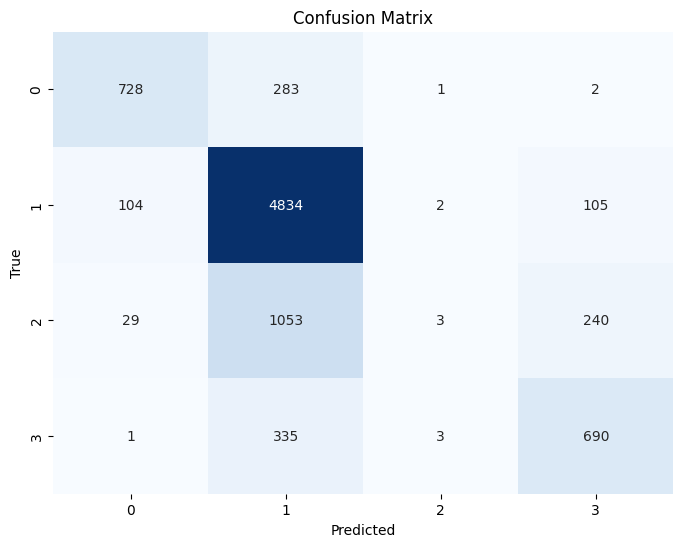

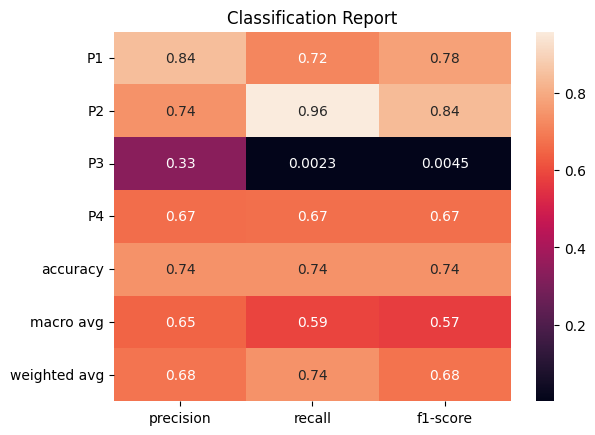

In [37]:
plot_confusion_matrix(y_test,y_pred)
plot_classification_report(y_test,y_pred)

In [39]:
import joblib
joblib.dump(ada_best_model,'ADB_best_model.pkl')

['ADB_best_model.pkl']

## Model 7: XGBoost Classifier

In [33]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],       # Learning rate
    'n_estimators': [ 300],         # Number of boosting rounds
    'max_depth': [3, 5, 7]                   # Maximum depth of the trees
}

xgb_classifier = XGBClassifier(objective='multi:softmax',  num_class=4,enable_categorical=True)
label_encoder = LabelEncoder()
df_encoded['EDUCATION'] = df_encoded['EDUCATION'].astype('category')
y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )
y_encoded = label_encoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)
grid_search=GridSearchCV(xgb_classifier,param_grid)


grid_search.fit(x_train,y_train)


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=4,
                                     num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [300]})

In [34]:
best_params=grid_search.best_params_
best_accuracy=grid_search.best_score_
print("XGBoost Classifier: ")
print("Best Parameters: ",best_params)
print("Best Accuracy: ",best_accuracy)
xgb_best_model=grid_search.best_estimator_
y_pred=xgb_best_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

XGBoost Classifier: 
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best Accuracy:  0.7795311529034563
Accuracy:  0.7795079044336146


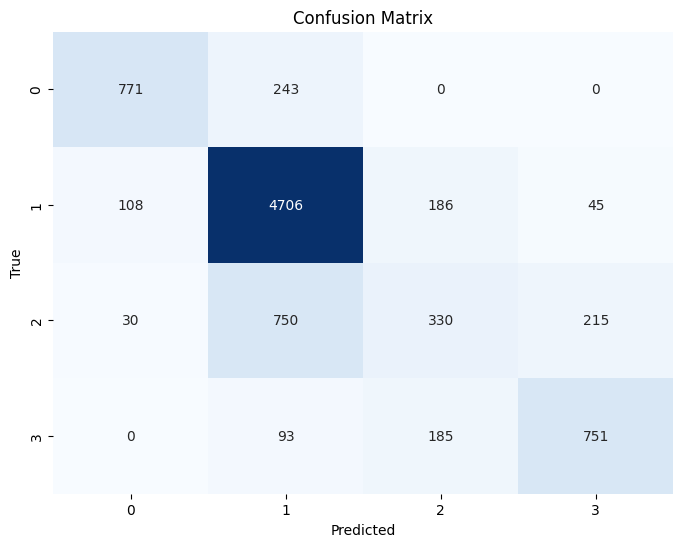

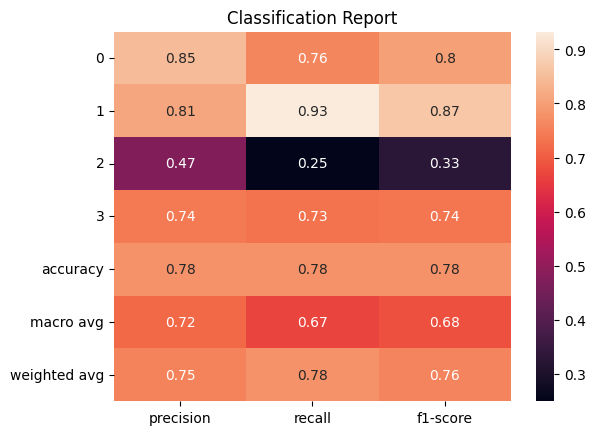

In [35]:
plot_confusion_matrix(y_test,y_pred)
plot_classification_report(y_test,y_pred)

In [40]:
import joblib
joblib.dump(xgb_best_model,'XGB_best_model.pkl')

['XGB_best_model.pkl']

## Model 8: LightGB Classifer

In [38]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],       # Learning rate
    'n_estimators': [200, 300],         # Number of boosting rounds
    'max_depth': [3, 5, 7]                   # Maximum depth of the trees
}

# Create a LightGBM classifier
lgb_classifier = LGBMClassifier(enable_categorical=True)

# Create GridSearchCV object
grid_search = GridSearchCV(lgb_classifier, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search.fit(x_train, y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

GridSearchCV(cv=5, estimator=LGBMClassifier(enable_categorical=True),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [200, 300]},
             scoring='accuracy')

In [41]:
best_params=grid_search.best_params_
best_accuracy=grid_search.best_score_
print("LightGBM Classifier: ")
print("Best Parameters: ",best_params)
print("Best Accuracy: ",best_accuracy)
lgb_best_model=grid_search.best_estimator_
y_pred=lgb_best_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

LightGBM Classifier: 
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best Accuracy:  0.7801849639831495
[LightGBM] [Warning] Unknown parameter: enable_categorical
Accuracy:  0.7803399500772614


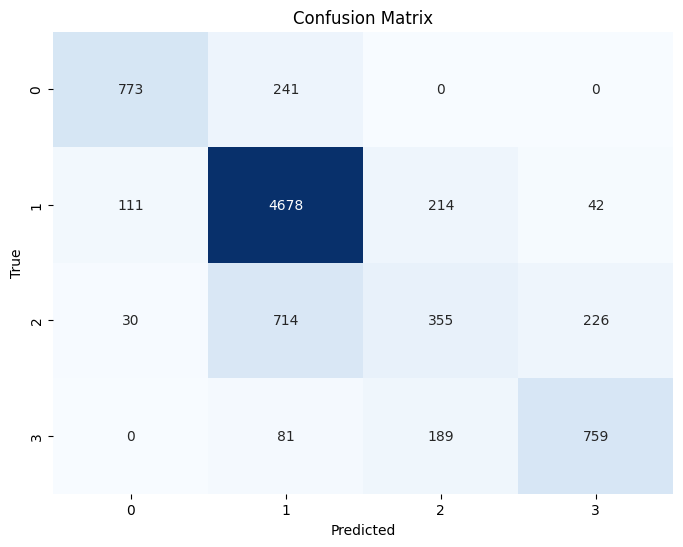

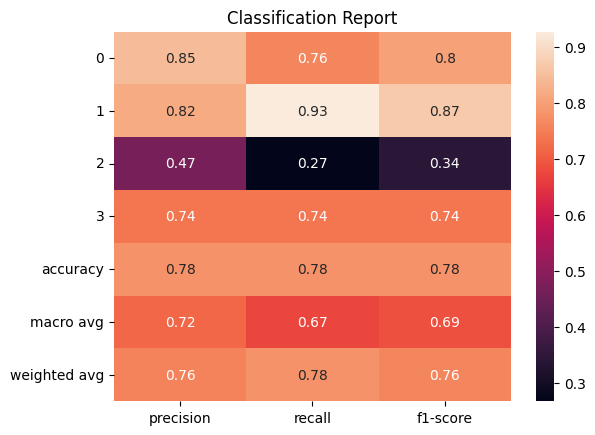

In [42]:
plot_confusion_matrix(y_test,y_pred)
plot_classification_report(y_test,y_pred)

In [43]:
joblib.dump(lgb_best_model,'LGB_best_model.pkl')

['LGB_best_model.pkl']

From the above analysis we found LGB and XGB classifier are better. Therefore we we would perform some Normalization or Standardization and then fine tune the models more

In [89]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               42064 non-null  float64
 1   pct_tl_closed_L6M             42064 non-null  float64
 2   Tot_TL_closed_L12M            42064 non-null  int64  
 3   pct_tl_closed_L12M            42064 non-null  float64
 4   Tot_Missed_Pmnt               42064 non-null  int64  
 5   CC_TL                         42064 non-null  int64  
 6   Home_TL                       42064 non-null  int64  
 7   PL_TL                         42064 non-null  int64  
 8   Secured_TL                    42064 non-null  int64  
 9   Unsecured_TL                  42064 non-null  int64  
 10  Other_TL                      42064 non-null  int64  
 11  Age_Oldest_TL                 42064 non-null  int64  
 12  Age_Newest_TL                 42064 non-null  int64  
 13  t

In [91]:
from sklearn.preprocessing import StandardScaler

cols_scales=['Age_Oldest_TL','Age_Newest_TL','time_since_recent_payment',
'max_recent_level_of_deliq','recent_level_of_deliq',
'time_since_recent_enq','NETMONTHLYINCOME','Time_With_Curr_Empr']

for i in cols_scales:
  cols_data=df_encoded[i].values.reshape(-1,1)
  scaler=StandardScaler()
  scaled_column=scaler.fit_transform(cols_data)
  df_encoded[i]=scaled_column

## XGradient Boost Model

In [31]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
# Define the parameter grid to search
param_grid = {
    'colsample_bytree':[0.3,0.5,0.9],
    'learning_rate': [0.01, 0.1, 0.2],       # Learning rate
    'n_estimators': [ 100,300],   # Number of boosting rounds
    'alpha':[0.01,0.1,1,5,10],
    'max_depth': [3, 5, 7]                   # Maximum depth of the trees
}

xgb_classifier = XGBClassifier(objective='multi:softmax',  num_class=4,enable_categorical=True)
label_encoder = LabelEncoder()
df_encoded['EDUCATION'] = df_encoded['EDUCATION'].astype('category')
y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )
y_encoded = label_encoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)
grid_search=GridSearchCV(xgb_classifier,param_grid,cv=3,scoring='accuracy',n_jobs=-1)


grid_search.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=4,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 5, 10],
                         'colsample_bytree': [0.3, 0.5, 0.9],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 300]},
             scoring='accuracy')

In [32]:
best_params=grid_search.best_params_
best_accuracy=grid_search.best_score_
print("XGBoost Classifier: ")
print("Best Parameters: ",best_params)
print("Best Accuracy: ",best_accuracy)
xgb_best_model=grid_search.best_estimator_
y_pred=xgb_best_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

XGBoost Classifier: 
Best Parameters:  {'alpha': 5, 'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
Best Accuracy:  0.7824135984071795
Accuracy:  0.7821229050279329


In [35]:
import joblib
joblib.dump(xgb_best_model,'XGB_best_model_Final.pkl')

['XGB_best_model_Final.pkl']